In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_raw = pd.read_csv("../../game_data.csv")
df_raw

,Id,Weapon0,Weapon1
0,0,Lebel 1886,Romero
1,1,Caldwell Pax,Lebel 1886
2,2,Lebel 1886,Specter 1882 Bayonet
3,3,Winfield M1873 Talon,Specter 1882 Bayonet
4,4,Sparks LRR,Specter 1882 Bayonet
...,...,...,...
9995,9995,Caldwell Pax,Winfield M1873 Talon
9996,9996,Lebel 1886,Caldwell Pax
9997,9997,Caldwell Pax,Winfield M1873 Talon
9998,9998,Sparks LRR,Romero


In [10]:
df_game_data = df_raw.reindex(df_raw.loc[:, "Id"]).drop("Id", axis=1)
df_game_data

,Weapon0,Weapon1
Id,,
0,Lebel 1886,Romero
1,Caldwell Pax,Lebel 1886
2,Lebel 1886,Specter 1882 Bayonet
3,Winfield M1873 Talon,Specter 1882 Bayonet
4,Sparks LRR,Specter 1882 Bayonet
...,...,...
9995,Caldwell Pax,Winfield M1873 Talon
9996,Lebel 1886,Caldwell Pax
9997,Caldwell Pax,Winfield M1873 Talon


In [11]:
df_game_data.loc[:,:] = df_game_data.loc[df_game_data["Weapon0"]!=df_game_data["Weapon1"], :]
df_game_data

,Weapon0,Weapon1
Id,,
0,Lebel 1886,Romero
1,Caldwell Pax,Lebel 1886
2,Lebel 1886,Specter 1882 Bayonet
3,Winfield M1873 Talon,Specter 1882 Bayonet
4,Sparks LRR,Specter 1882 Bayonet
...,...,...
9995,Caldwell Pax,Winfield M1873 Talon
9996,Lebel 1886,Caldwell Pax
9997,Caldwell Pax,Winfield M1873 Talon


In [12]:
df_plot_data = pd.DataFrame([[0]*3]*6,index =["Winfield M1873 Talon", "Romero", "Caldwell Pax",
                                    "Lebel 1886", "Sparks LRR", "Specter 1882 Bayonet"], 
                            columns = ["Games", "Wins", "Winrate"])
# print(df_plot_data)
grp0 = df_game_data.groupby("Weapon0")
grp1 = df_game_data.groupby("Weapon1")
# print(grp1.count())

df_plot_data = df_plot_data.join(grp0.count().loc[:, "Weapon1"]).join(grp1.count().loc[:, "Weapon0"]).fillna(0)
df_plot_data["Games"] = df_plot_data["Weapon1"] + df_plot_data["Weapon0"]
# print(df_plot_data)
df_plot_data["Wins"] = df_plot_data["Weapon1"]
df_plot_data["Winrate"] = df_plot_data["Wins"]/df_plot_data["Games"]
df_plot_data

,Games,Wins,Winrate,Weapon1,Weapon0
Winfield M1873 Talon,2756,1725,0.625907,1725,1031
Romero,2872,484,0.168524,484,2388
Caldwell Pax,2730,1292,0.473260,1292,1438
Lebel 1886,3028,2596,0.857332,2596,432
Sparks LRR,2700,1787,0.661852,1787,913
Specter 1882 Bayonet,2670,494,0.185019,494,2176


In [17]:
df_plot_data["Winrate_deviation"] = abs(df_plot_data["Winrate"]-0.5)
reward = 3 - df_plot_data["Winrate_deviation"].sum()
reward, df_plot_data["Winrate_deviation"]

(1.6817119411293202,
 Winfield M1873 Talon    0.125907
 Romero                  0.331476
 Caldwell Pax            0.026740
 Lebel 1886              0.357332
 Sparks LRR              0.161852
 Specter 1882 Bayonet    0.314981
 Name: Winrate_deviation, dtype: float64)

,Winrate
Winfield M1873 Talon,0.625907
Romero,0.168524
Caldwell Pax,0.473260
Lebel 1886,0.857332
Sparks LRR,0.661852
Specter 1882 Bayonet,0.185019


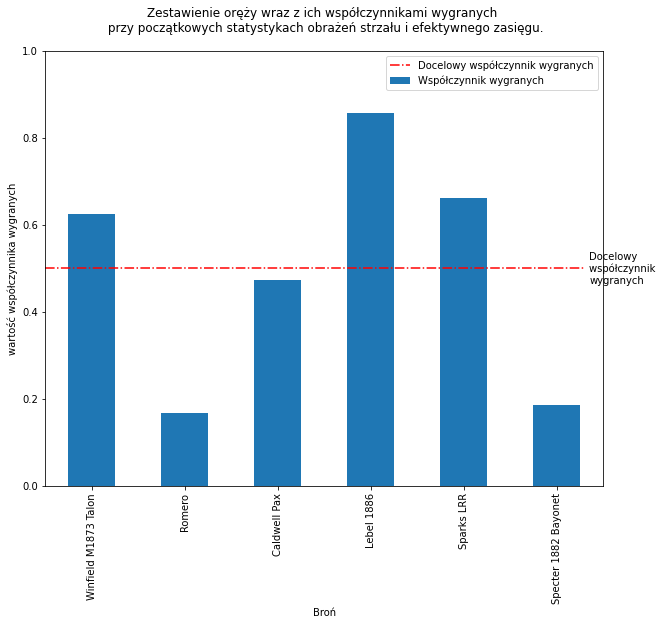

In [32]:
plot_data = df_plot_data.drop(["Wins", "Games", "Weapon1", "Weapon0", "Winrate_deviation"], axis=1)
plot_data.plot(kind='bar', ylabel='wartość współczynnika wygranych', xlabel='Broń', figsize=(10, 8))
plt.title('Zestawienie oręży wraz z ich współczynnikami wygranych \n przy początkowych statystykach obrażeń strzału i efektywnego zasięgu.', y=1.03)
plt.hlines(0.5, -0.5, 5.3, color='red', label="Docelowy współczynnik wygranych", linestyle="-.")
plt.text(5.35, 0.5, 'Docelowy \nwspółczynnik \nwygranych', ha='left', va='center')
plt.ylim([0, 1])
plt.legend().get_texts()[1].set_text('Współczynnik wygranych')
plot_data

,Winrate_deviation
Winfield M1873 Talon,0.125907
Romero,0.331476
Caldwell Pax,0.026740
Lebel 1886,0.357332
Sparks LRR,0.161852
Specter 1882 Bayonet,0.314981


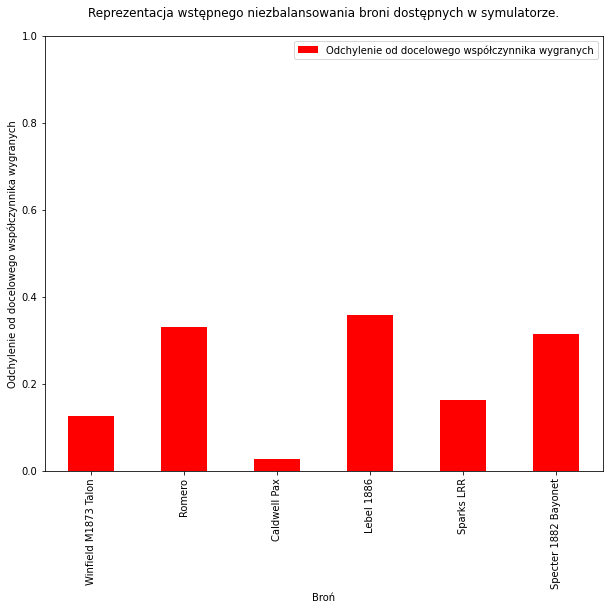

In [39]:
plot_data = df_plot_data.drop(["Wins", "Games", "Weapon1", "Weapon0", "Winrate"], axis=1)
plot_data.plot(kind='bar', ylabel='Odchylenie od docelowego współczynnika wygranych', xlabel='Broń', figsize=(10, 8), color="red")
plt.title('Reprezentacja wstępnego niezbalansowania broni dostępnych w symulatorze.', y=1.03)
# plt.hlines(0.5, -0.5, 5.3, color='red', label="Docelowy współczynnik wygranych", linestyle="-.")
# plt.text(5.35, 0.5, 'Docelowy \nwspółczynnik \nwygranych', ha='left', va='center')
plt.ylim([0, 1])
plt.legend().get_texts()[0].set_text('Odchylenie od docelowego współczynnika wygranych')
plot_data

Caldwell Pax jest na ten moment poprawnie zbalansowany - jest około 50%. Należy nieco pogorszyć Lebel'a, Sparks'a i Winfield'a - są zbyt mocne. Polepszenia wymagają Romero i Specter, więc strzelby bliskiego zasięgu.

In [15]:
df_game_data.loc[:, "1"] = 1
df_cross_winrates = df_game_data.groupby(["Weapon0", "Weapon1"]).count()

weapons = ["Caldwell Pax", "Lebel 1886", "Romero", "Sparks LRR",
           "Specter 1882 Bayonet", "Winfield M1873 Talon"]
df_winrate_matrix = pd.DataFrame(columns = weapons, index = weapons)
for weapon1 in weapons:
    for weapon2 in weapons:
        if weapon1 != weapon2:
            wins_with_w1 = df_cross_winrates.loc[(weapon1, weapon2), "1"]
            wins_with_w2 = df_cross_winrates.loc[(weapon2, weapon1), "1"]
            df_winrate_matrix.at[weapon1, weapon2] = wins_with_w1/(wins_with_w1+wins_with_w2)
        else:
            df_winrate_matrix.at[weapon1, weapon2] = 0.5

df_winrate_matrix = df_winrate_matrix.astype("float")
df_winrate_matrix

KeyError: ('Specter 1882 Bayonet', 'Winfield M1873 Talon')

TypeError: Image data of dtype object cannot be converted to float

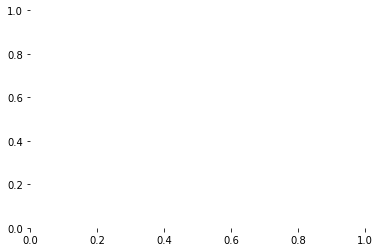

In [16]:
sns.heatmap(data = df_winrate_matrix, cmap=sns.color_palette("crest", as_cmap=True), annot=True)